## Spooky Author Identification

This project was carried out as part of a machine learning competition to identify the authors of horror stories. Using quotes from the works of famous authors such as Edgar Allan Poe, Mary Shelley and H.P. Lovecraft, the aim was to guess which author each quote belongs to. The richness of horror literature and the unique styles and themes of the authors were analyzed in depth in this project.

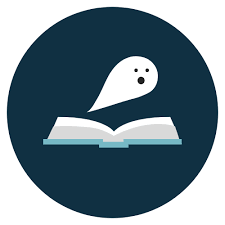

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spooky-author-identification/train.zip
/kaggle/input/spooky-author-identification/test.zip
/kaggle/input/spooky-author-identification/sample_submission.zip


In [5]:
zip_file_path = '/kaggle/input/spooky-author-identification/train.zip'
output_directory = '/kaggle/working/train_data'

os.makedirs(output_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

In [6]:
zip_file_path = '/kaggle/input/spooky-author-identification/test.zip'
output_directory = '/kaggle/working/test_data'

os.makedirs(output_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

## Import Libraries

In [4]:
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [70]:
train=pd.read_csv('/kaggle/working/train_data/train.csv')
test=pd.read_csv('/kaggle/working/test_data/test.csv')
#Reading the file.

## EDA

In [10]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [11]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [12]:
train.shape, test.shape

((19579, 3), (8392, 2))

In [13]:
train.isnull().sum()

id        0
text      0
author    0
dtype: int64

In [14]:
test.isnull().sum()

id      0
text    0
dtype: int64

In [71]:
df=pd.concat([train,test])

In [16]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [72]:
df.drop('id',axis=1)

,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL
...,...,...
8387,All this is now the fitter for my purpose.,NaN
8388,I fixed myself on a wide solitude.,NaN
8389,It is easily understood that what might improv...,NaN
8390,"Be this as it may, I now began to feel the ins...",NaN


In [73]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\n','',regex=True)
df['text']=df['text'].str.replace('\r','',regex=True)

In [74]:
df['text'][15]

15    he had escaped me and i must commence a destru...
15      idris heard of her mothers return with pleasure
Name: text, dtype: object

In [21]:
df['author'].value_counts()

author
EAP    7900
MWS    6044
HPL    5635
Name: count, dtype: int64

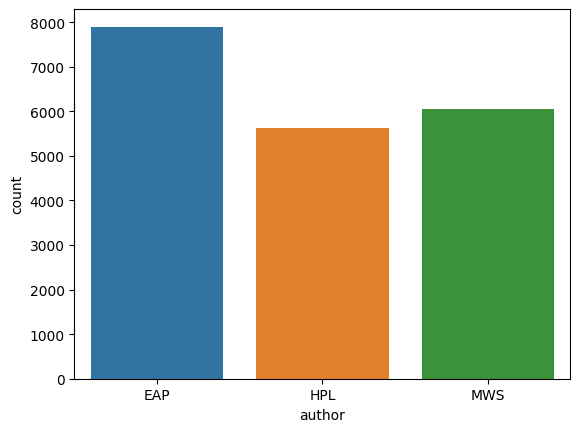

In [24]:
sns.countplot(x=df['author']);

## WordCloud

In [89]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('/kaggle/input/cloudd/cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

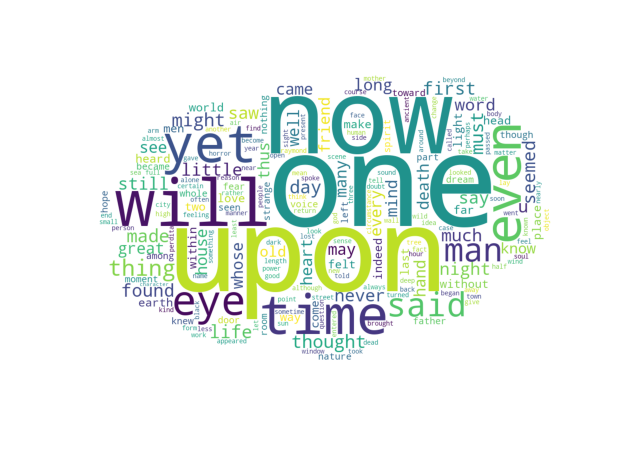

In [91]:
wc(df['text'],'white')

In [25]:
train.shape

(19579, 3)

## Modelling

In [75]:
train=df[:19579]
test=df[19579:]

In [27]:
from textblob import TextBlob

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [29]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [30]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [31]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification

In [76]:
x=train['text']
y=train['author']

In [77]:
x=vect.fit_transform(x)

In [78]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

In [79]:
r=RandomForestClassifier()
model=r.fit(x_train,y_train)

In [80]:
rpred=r.predict(x_test)
accuracy_score(rpred,y_test)

0.7070990806945863

In [42]:
print(classification_report(rpred, y_test))

              precision    recall  f1-score   support

         EAP       0.88      0.64      0.74      2149
         HPL       0.58      0.78      0.66       796
         MWS       0.61      0.81      0.70       971

    accuracy                           0.71      3916
   macro avg       0.69      0.74      0.70      3916
weighted avg       0.75      0.71      0.72      3916



In [43]:
confusion_matrix(rpred, y_test)

array([[1382,  381,  386],
       [  71,  618,  107],
       [ 117,   72,  782]])

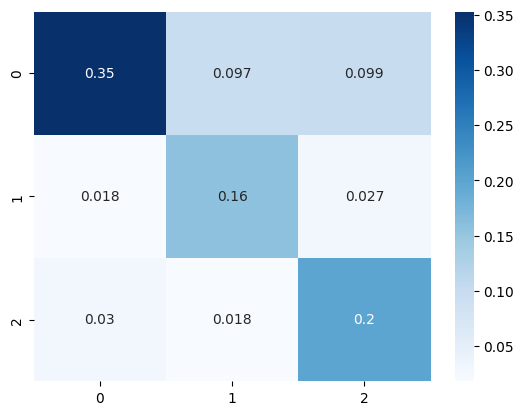

In [44]:
cm = confusion_matrix(rpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues');

In [46]:
#K-Fold Cross Validation
x=train['text']
y=train['author']
x=vect.fit_transform(x)

model=RandomForestClassifier()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.71144025 0.69484168 0.70480082 0.68692543 0.71443167]
Mean Accuracy: 0.702487968931208


In [47]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):
    
    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr, b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB', 'MultinomialNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
        
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1
    
    
    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [48]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
MultinomialNB,0.835546,0.836701,0.835546,0.835527
BernoulliNB,0.832993,0.836015,0.832993,0.832724
Logistic Regression,0.817926,0.818397,0.817926,0.817742
MLP Classifier,0.775536,0.775622,0.775536,0.775501
SVM,0.775281,0.784221,0.775281,0.774163
Random Forest,0.703524,0.729201,0.703524,0.698397
Gradient Boosting,0.672880,0.697364,0.672880,0.666606
AdaBoost,0.614658,0.624798,0.614658,0.610295
Decision Tree,0.541113,0.540523,0.541113,0.540361
K-Nearest Neighbors,0.463994,0.496179,0.463994,0.406322


## Test Data Prediction

In [81]:
test.head()

,id,text,author
0,id02310,still as i urged our leaving ireland with such...,NaN
1,id24541,if a fire wanted fanning it could readily be f...,NaN
2,id00134,and when they had broken down the frail door t...,NaN
3,id27757,while i was thinking how i should possibly man...,NaN
4,id04081,i am not sure to what limit his knowledge may ...,NaN


In [82]:
x_test=test.drop('author', axis=1)

In [83]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [84]:
x_test=vect.transform(test['text'])

In [85]:
predictions=nb.predict(x_test)

In [86]:
predictions1=pd.DataFrame()
predictions1['id']=test['id']
predictions1['author']=predictions

In [88]:
predictions1.to_csv('author_submission.csv', index=False)

## Summary

First, the given training and test datasets were read and the necessary preprocessing steps were performed. The text data was cleaned, unnecessary characters and spaces were removed. The training and test sets were combined in a suitable format for the model to learn better. Visualization techniques such as word clouds and scatter plots were used.
The text data was transformed into a suitable format for the model to learn. The text data was converted to numerical data using fit_transform methods. Then, a suitable machine learning model was selected and the training process was carried out. After the training was completed, predictions were made on the test dataset. The obtained predictions were saved in a CSV file with the identities of the relevant authors.

The project developed an effective machine learning approach to recognize iconic authors of horror literature. The obtained results reflect the stylistic differences of the authors and deepen our understanding of text analysis. Such projects obtained within the scope of the competition encourage knowledge sharing with the community and offer participants the opportunity to win valuable prizes. The project was successfully completed and provided significant learning and development opportunities for the participants.